In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
import math

平面扩散

In [26]:
def randomwalk():
    P=[0,0]
    while(((P[0]<20 and P[0]>-20 and P[1]<20 and P[1]>-20 ) and not((P[0]<=14 and P[0]>=13) and (P[1]<=8 and P[1]>=7)))):
        u=random.uniform(0,1)
        if u<0.25:
            P[0]+=1
        elif u<0.5:
            P[0]-=1
        elif u<0.75:
            P[1]+=1
        else:
            P[1]-=1            
    return P[0],P[1]

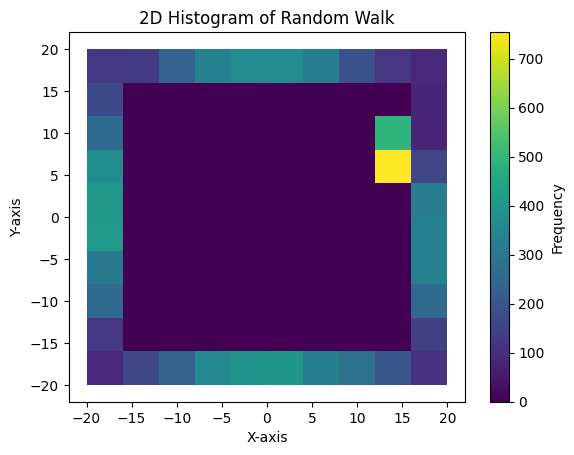

In [27]:
def Simulate(times):
    DataX=[]
    DataY=[]
    for t in range(times):
        x,y=randomwalk()
        
        DataX.append(x)
        DataY.append(y)
    plt.hist2d(DataX,DataY)
    plt.colorbar(label='Frequency')
    plt.title('2D Histogram of Random Walk')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.xlim(-22, 22)
    plt.ylim(-22, 22)
    plt.show()
Simulate(10000)

In [28]:
def randomwalk2():
    P=[0,0]
    while(((P[0]<20 and P[0]>-20 and P[1]<20 and P[1]>-20 ) and not((P[0]<=12 and P[0]>=-12) and (P[1]==6)))):
        u=random.uniform(0,1)
        if u<0.25:
            P[0]+=1
        elif u<0.5:
            P[0]-=1
        elif u<0.75:
            P[1]+=1
        else:
            P[1]-=1            
    return P[0],P[1]

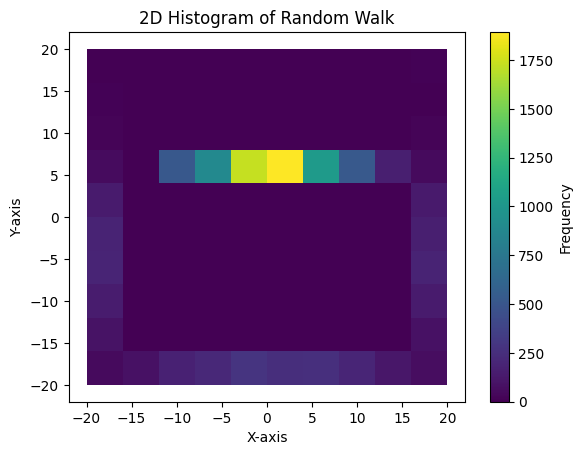

In [29]:
def Simulate(times):
    DataX=[]
    DataY=[]
    for t in range(times):
        x,y=randomwalk2()
        
        DataX.append(x)
        DataY.append(y)
    plt.hist2d(DataX,DataY)
    plt.colorbar(label='Frequency')
    plt.title('2D Histogram of Random Walk')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.xlim(-22, 22)
    plt.ylim(-22, 22)
    plt.show()
Simulate(10000)

列维飞行
积分可以得到：
$$\int _0^t \frac{2}{\pi 1+x^2} =2/\pi*arctan(x)|^t_0=2/\pi*arctan(t)$$

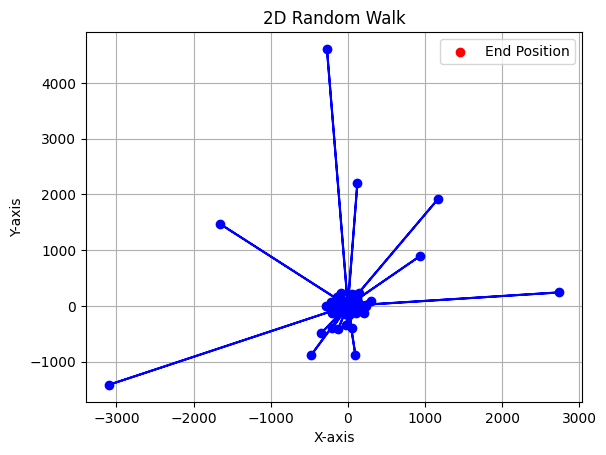

In [45]:
def randomwalk3():
    P=[0,0]
    theta=random.uniform(0,360.001)
    while(theta>360):
        theta=random.uniform(0,360.001)
    x=random.uniform(0,1)
    y=math.tan(math.pi/2*x)
    x0=y*math.cos(theta/180*math.pi)
    y0=y*math.sin(theta/180*math.pi)            
    P[0]+=x0
    P[1]+=y0
    return P[0],P[1]
def random_walk_2D(num_steps):
    x = np.zeros(num_steps + 1)
    y = np.zeros(num_steps + 1)

    for i in range(1, num_steps + 1):
        # 随机选择方向
        angle = np.random.uniform(0, 2 * np.pi)
        x[i],y[i]=randomwalk3()

    return x, y
def plot_random_walk(x, y):
    plt.plot(x, y, marker='o', linestyle='-', color='b')
    plt.scatter(x[-1], y[-1], color='r', label='End Position')
    plt.title('2D Random Walk')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.legend()
    plt.grid(True)
    plt.show()

# 模拟随机游走
num_steps = 10000
x, y = random_walk_2D(num_steps)

# 绘制最终位置分布图
plot_random_walk(x, y)

雅可比迭代

In [42]:
import numpy as np

def jacobi_method(A, b, max_iterations=100000, tol=1e-3):
    n = len(b)
    x = np.zeros(n)
    for k in range(max_iterations):
        x_new = np.zeros(n)
        for i in range(n):
            x_new[i] = (b[i] - np.dot(A[i, :i], x[:i]) - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]
        if np.linalg.norm(x_new - x, ord=np.inf) < tol:
            return x_new
        x = x_new
    raise ValueError("Jacobi method did not converge within the specified tolerance.")
A3 = np.array([[4, -1, 0],
               [-1, 4, -1],
               [0, -1, 4]])
b3 = np.array([15, 10, 10])

solution_3 = jacobi_method(A3, b3)
print("Jacobi Method - 3阶线性方程组的解:", solution_3)



Jacobi Method - 3阶线性方程组的解: [4.91043091 4.64233398 3.66043091]


Monte Carlo方法



In [44]:
import numpy as np

def monte_carlo_method(A, b, num_samples=100000):
    n = len(b)
    x_samples = np.random.rand(num_samples, n)
    b_samples = np.dot(x_samples, A.T)
    x_estimate = np.linalg.lstsq(A, b_samples.T, rcond=None)[0].mean(axis=1)
    return x_estimate

A3 = np.array([[4, -1, 0],
               [-1, 4, -1],
               [0, -1, 4]])
b3 = np.array([15, 10, 10])
# 3阶线性方程组的例子
A10 = np.random.rand(10, 10)
b10 = np.random.rand(10)

solution_3 = jacobi_method(A3, b3)
print("Jacobi Method - 3阶线性方程组的解:", solution_3)




solution_3 = monte_carlo_method(A3, b3)
print("Monte Carlo Method - 3阶线性方程组的解:", solution_3)
# 10阶线性方程组的例子
A10 = np.random.rand(10, 10)
b10 = np.random.rand(10)

solution_10 = monte_carlo_method(A10, b10)
print("Monte Carlo Method - 10阶线性方程组的解:", solution_10)


Jacobi Method - 3阶线性方程组的解: [4.91043091 4.64233398 3.66043091]
Monte Carlo Method - 3阶线性方程组的解: [0.50001453 0.50013696 0.49994444]
Monte Carlo Method - 10阶线性方程组的解: [0.5003056  0.50101161 0.49920796 0.50067171 0.49919134 0.50175129
 0.49985776 0.49884955 0.50002169 0.49938059]


Jacobi Method 迭代次数有限，面对10阶迭代已经力不从心